In [1]:
from __future__ import print_function
import wntr
import pandas as pd
import pickle
import matplotlib.pylab as plt

In [2]:
wn = wntr.network.WaterNetworkModel('C:/Users/kaiorodrigues/Desktop/WNTR/1_Data/Vale_do_Amanhecer_Final_temp.inp')
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()

In [3]:
node_keys = results.node.keys()
print(node_keys)

dict_keys(['demand', 'head', 'pressure', 'quality'])


In [4]:
link_keys = results.link.keys()
print(link_keys)

dict_keys(['quality', 'flowrate', 'velocity', 'headloss', 'status', 'setting', 'friction_factor', 'reaction_rate'])


In [29]:
wn = wntr.network.WaterNetworkModel('C:/Users/kaiorodrigues/Desktop/WNTR/1_Data/Vale_do_Amanhecer_Final_temp.inp')
node_coords = wn.node_coordinates()
import utm

coords = {}
for node_id, (x, y) in node_coords.items():
    lat, lon, _, _ = utm.to_latlon(x, y, wn.options["model_latitude"], wn.options["model_longitude"])
    coords[node_id] = {"Latitude": lat, "Longitude": lon}

coord_table = pd.DataFrame(coords).T

AttributeError: 'WaterNetworkModel' object has no attribute 'node_coordinates'

In [28]:
node_coords

<Node 'j10'>

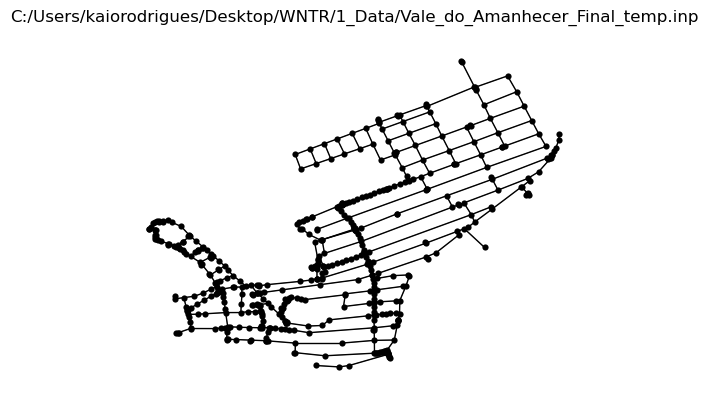

<AxesSubplot:title={'center':'C:/Users/kaiorodrigues/Desktop/WNTR/1_Data/Vale_do_Amanhecer_Final_temp.inp'}>

In [5]:
wntr.graphics.plot_network(wn, title=wn.name)

In [6]:
pressure = results.node['pressure']

In [7]:
pressure

name,J10,J100,J1000,J1002,J1004,J1006,J1008,J1010,J1012,J1014,...,J988,J990,J992,J994,J996,J998,V8002_NU,V8002_ND,RAP.VAM.001.LIT.001.000,RAP.VAM.001.LIT.002.000
0,24.662086,15.496997,26.364416,20.933559,16.826904,16.789103,10.935036,16.706636,16.702841,30.464672,...,34.065449,27.733427,30.261936,25.544603,20.004816,26.739035,29.026236,9.999973,-1.953125e-07,-1.953125e-07
3600,24.726677,16.201773,26.423798,20.989071,16.879292,16.835983,10.937119,16.712440,16.709316,31.118919,...,34.156681,27.798540,30.329578,25.592079,20.055639,26.795218,29.093878,9.999973,-1.953125e-07,-1.953125e-07
7200,24.749893,16.454409,26.445005,21.009014,16.898045,16.852800,10.937863,16.714451,16.711622,31.353474,...,34.189350,27.821831,30.353910,25.609119,20.073872,26.815384,29.118212,9.999973,-1.953125e-07,-1.953125e-07
10800,24.758898,16.552486,26.453341,21.016754,16.905336,16.859348,10.938161,16.715269,16.712515,31.444555,...,34.202072,27.830910,30.363287,25.615669,20.080940,26.823198,29.127586,9.999973,-1.953125e-07,-1.953125e-07
14400,24.726751,16.201698,26.423798,20.989071,16.879292,16.835983,10.937119,16.712440,16.709316,31.118845,...,34.156681,27.798540,30.329653,25.592079,20.055639,26.795218,29.093878,9.999973,-1.953125e-07,-1.953125e-07
18000,24.424257,12.906122,26.146160,20.729366,16.634247,16.616760,10.927371,16.685503,16.678955,28.059088,...,33.730587,27.494186,30.013020,25.370028,19.817812,26.532387,28.777321,9.999973,-1.953125e-07,-1.953125e-07
21600,24.348803,12.083996,26.076954,20.664553,16.573153,16.562065,10.924915,16.678806,16.671438,27.295748,...,33.624027,27.418283,29.933992,25.314663,19.758505,26.466829,28.698292,9.999973,-1.953125e-07,-1.953125e-07
25200,24.129652,9.695677,25.875738,20.476284,16.395525,16.403191,10.917920,16.659309,16.649412,25.078358,...,33.315506,27.197721,29.704575,25.153706,19.586163,26.276329,28.468874,9.999973,-1.953125e-07,-1.953125e-07
28800,23.835867,6.495202,25.606136,20.224094,16.157623,16.190292,10.908395,16.633265,16.620018,22.106855,...,32.901318,26.902147,29.397020,24.938055,19.355255,26.021090,28.161396,9.999973,-1.953125e-07,-1.953125e-07
32400,23.605183,3.981197,25.394354,20.025856,15.970621,16.023085,10.901028,16.612726,16.596876,19.772785,...,32.576721,26.670050,29.155621,24.768763,19.173834,25.820618,27.919922,9.999973,-1.953125e-07,-1.953125e-07


In [8]:
pressure_at_node123 = pressure.loc[:,'RAP.VAM.001.FIT.001.000.000']

In [9]:
print(pressure_at_node123)

0        10.938235
3600     10.939649
7200     10.940170
10800    10.940393
14400    10.939649
18000    10.932803
21600    10.931091
25200    10.926031
28800    10.919409
32400    10.914125
36000    10.911595
39600    10.910627
43200    10.915464
46800    10.917474
50400    10.918738
54000    10.918962
57600    10.918962
61200    10.917697
64800    10.917697
68400    10.920227
72000    10.923055
75600    10.927371
79200    10.931091
82800    10.936226
86400    10.938235
Name: RAP.VAM.001.FIT.001.000.000, dtype: float32


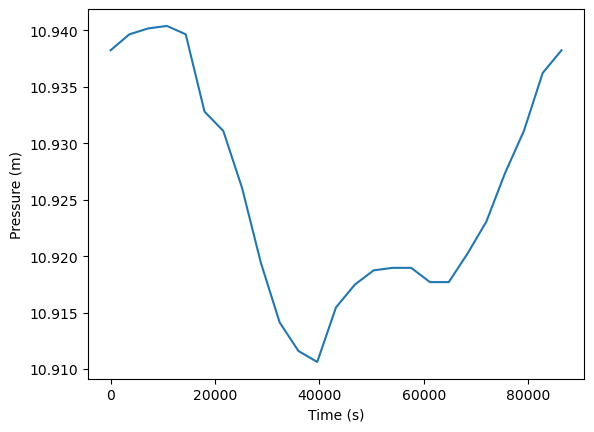

In [10]:
ax = pressure_at_node123.plot()
text = ax.set_xlabel("Time (s)")
text = ax.set_ylabel("Pressure (m)")

In [11]:
pressure_at_1hr = pressure.loc[3600,:]

In [12]:
pressure_at_2hr = pressure.loc[7200,:]

In [13]:
pressure_at_1hr.min()

-1.9531249506599124e-07

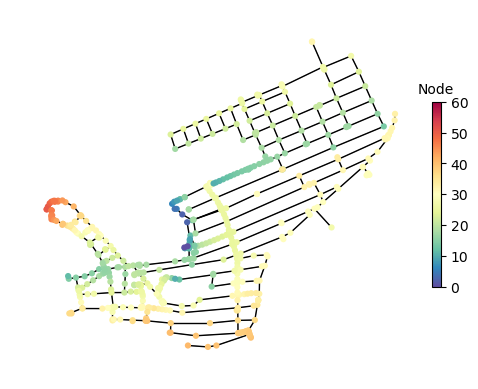

In [14]:
ax = wntr.graphics.plot_network(wn, node_attribute=pressure_at_1hr, node_range=[0,60])

In [15]:
link_keys = results.link.keys()
print(link_keys)

dict_keys(['quality', 'flowrate', 'velocity', 'headloss', 'status', 'setting', 'friction_factor', 'reaction_rate'])


In [20]:
headloss = results.link['setting']

In [21]:
headloss

,0,1,10,100,101,102,103,104,105,106,...,96,97,98,99,P21,P31,P33,P35,P37,VRP.PLT.016
0,135.0,135.0,132.5,132.5,132.5,132.5,135.0,132.5,135.0,132.5,...,135.0,132.5,132.5,132.5,125.0,135.0,135.0,135.0,135.0,10.0
3600,135.0,135.0,132.5,132.5,132.5,132.5,135.0,132.5,135.0,132.5,...,135.0,132.5,132.5,132.5,125.0,135.0,135.0,135.0,135.0,10.0
7200,135.0,135.0,132.5,132.5,132.5,132.5,135.0,132.5,135.0,132.5,...,135.0,132.5,132.5,132.5,125.0,135.0,135.0,135.0,135.0,10.0
10800,135.0,135.0,132.5,132.5,132.5,132.5,135.0,132.5,135.0,132.5,...,135.0,132.5,132.5,132.5,125.0,135.0,135.0,135.0,135.0,10.0
14400,135.0,135.0,132.5,132.5,132.5,132.5,135.0,132.5,135.0,132.5,...,135.0,132.5,132.5,132.5,125.0,135.0,135.0,135.0,135.0,10.0
18000,135.0,135.0,132.5,132.5,132.5,132.5,135.0,132.5,135.0,132.5,...,135.0,132.5,132.5,132.5,125.0,135.0,135.0,135.0,135.0,10.0
21600,135.0,135.0,132.5,132.5,132.5,132.5,135.0,132.5,135.0,132.5,...,135.0,132.5,132.5,132.5,125.0,135.0,135.0,135.0,135.0,10.0
25200,135.0,135.0,132.5,132.5,132.5,132.5,135.0,132.5,135.0,132.5,...,135.0,132.5,132.5,132.5,125.0,135.0,135.0,135.0,135.0,10.0
28800,135.0,135.0,132.5,132.5,132.5,132.5,135.0,132.5,135.0,132.5,...,135.0,132.5,132.5,132.5,125.0,135.0,135.0,135.0,135.0,10.0
32400,135.0,135.0,132.5,132.5,132.5,132.5,135.0,132.5,135.0,132.5,...,135.0,132.5,132.5,132.5,125.0,135.0,135.0,135.0,135.0,10.0


In [16]:
Flow = results.link['flowrate']
Flow = Flow.abs()
Flow = Flow.multiply(1000)

In [17]:
Flow_at_1hr = Flow.loc[0,:]

In [18]:
Flow_at_1hr.max()

32.110313415527344

In [19]:
Flow

name,0,1,10,100,101,102,103,104,105,106,...,96,97,98,99,P21,P31,P33,P35,P37,VRP.PLT.016
0,7.273718e-05,28.457808,0.436371,0.423526,0.292152,0.310480,0.347231,2.760898e-08,1.947448e-04,0.128293,...,0.630882,0.246430,0.841978,0.603720,0.009303,9.788944,22.321371,10.098475,10.098688,10.098475
3600,2.884873e-06,25.375006,0.389123,0.377639,0.260492,0.276834,0.309598,3.055140e-09,5.011111e-07,0.114395,...,0.562533,0.219717,0.750753,0.538306,0.008171,8.728497,19.903273,9.004765,9.004473,9.004765
7200,3.346224e-05,24.188889,0.370924,0.359988,0.248311,0.263890,0.295128,3.236471e-09,1.274745e-04,0.109049,...,0.536247,0.209447,0.715663,0.513144,0.007768,8.320502,18.972935,8.583704,8.583820,8.583704
10800,1.408160e-04,23.714981,0.363666,0.352932,0.243448,0.258721,0.289342,1.950916e-08,5.078772e-07,0.106911,...,0.525736,0.205341,0.701636,0.503088,0.007731,8.157479,18.601202,8.415589,8.415397,8.415589
14400,7.273718e-05,25.374741,0.389123,0.377642,0.260499,0.276841,0.309613,2.830280e-05,8.596872e-07,0.114395,...,0.562535,0.219732,0.750760,0.538314,0.008302,8.728424,19.903109,9.004580,9.004474,9.004580
18000,7.273718e-05,37.942768,0.581839,0.564692,0.389517,0.413954,0.462949,1.450068e-06,1.977994e-04,0.171058,...,0.841175,0.328547,1.122618,0.804941,0.012049,13.051588,29.761055,13.464632,13.464830,13.464632
21600,0.000000e+00,40.552353,0.621869,0.603516,0.416299,0.442416,0.494780,1.010464e-08,7.697256e-07,0.182818,...,0.899006,0.351138,1.199800,0.860283,0.013058,13.949211,31.807873,14.390469,14.390327,14.390469
25200,1.408160e-04,47.429218,0.727312,0.705873,0.486912,0.517458,0.578687,1.801498e-04,1.512376e-04,0.213822,...,1.051466,0.410685,1.403288,1.006192,0.015272,16.314730,37.201878,16.830791,16.830944,16.830791
28800,7.273718e-05,55.493011,0.850979,0.825872,0.569687,0.605426,0.677062,2.367962e-04,2.237892e-07,0.250172,...,1.230218,0.480500,1.641847,1.177245,0.017770,19.088493,43.526791,19.692289,19.692022,19.692289
32400,7.273718e-05,61.183243,0.938222,0.910566,0.628096,0.667501,0.746505,1.160574e-08,2.571554e-04,0.275830,...,1.356394,0.529782,1.810221,1.297968,0.019825,21.045849,47.990078,21.711720,21.711994,21.711720


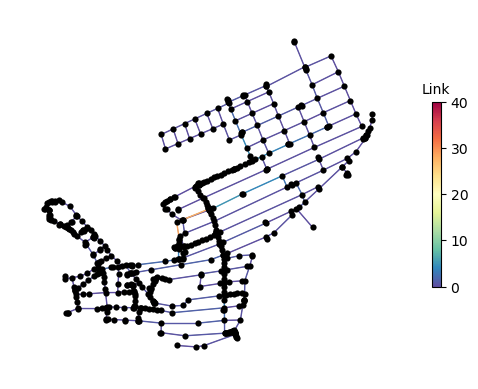

In [20]:
ax = wntr.graphics.plot_network(wn, link_attribute=Flow_at_1hr, link_range=[0,40])

In [21]:
Flow.to_excel("C:/Users/kaiorodrigues/Desktop/WNTR/2_DadosReservatorio/Flow.xlsx")

In [52]:
df = pd.read_excel('C:/Users/kaiorodrigues/Desktop/WNTR/2_DadosReservatorio/RAP.VAM.FLOW.xlsx')
df = df.drop(['Unnamed: 0'],axis = 1)

In [23]:
df2 = pd.read_excel("C:/Users/kaiorodrigues/Desktop/WNTR/2_DadosReservatorio/Flow.xlsx")
df2 = df2.rename(columns={"Unnamed: 0": "Hora"})

In [23]:
# df = df.query('tagname == "RAP.VAM.001.FIT.001.000.000" | tagname == "RAP.VAM.001.FIT.002.000.000"')
# 

In [25]:
df2 = df2[['Hora','577', '415']]

In [26]:
def transpose_data(data):
        df = data.copy()

        column = df.groupby(['tagname'])['value'].apply(list).index
        values = df.groupby(['tagname'])['value'].apply(list).values
        index  = df.groupby(['tagname'])['Hora'].apply(list).values

        return pd.concat((pd.DataFrame(data = {c:v},index=i) for c,v,i in zip(column,values,index)),axis=1,ignore_index=False)

In [53]:
df = transpose_data(df)
df = df.reset_index()
df = df.rename(columns={'index': 'Hora'})
# df = df.set_index('index')

In [28]:
df

,Hora,RAP.VAM.001.FIT.001.000.000,RAP.VAM.001.FIT.002.000.000
0,0,1.543155,23.822874
1,1,1.419014,21.622439
2,2,1.247352,18.830754
3,3,1.054682,15.867657
4,4,0.875746,11.978818
5,5,0.750065,10.155975
6,6,0.684021,9.167936
7,7,0.673316,8.878307
8,8,0.704690,9.294257
9,9,0.801243,11.106532


In [29]:
df2["Hora"] = df2["Hora"]/3600
df2['Hora'] = df2['Hora'].astype(int)

C:\Users\kaiorodrigues\AppData\Local\Temp\ipykernel_9124\4080708456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Hora"] = df2["Hora"]/3600
C:\Users\kaiorodrigues\AppData\Local\Temp\ipykernel_9124\4080708456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Hora'] = df2['Hora'].astype(int)


In [30]:
df2.head()

,Hora,577,415
0,0,3.538091,28.572226
1,1,3.154742,25.477030
2,2,3.007294,24.286142
3,3,2.948352,23.810331
4,4,3.154770,25.476761


In [31]:
Uniao = df.merge(df2, left_on='Hora', right_on='Hora')

In [32]:
Uniao

,Hora,RAP.VAM.001.FIT.001.000.000,RAP.VAM.001.FIT.002.000.000,577,415
0,0,1.543155,23.822874,3.538091,28.572226
1,1,1.419014,21.622439,3.154742,25.477030
2,2,1.247352,18.830754,3.007294,24.286142
3,3,1.054682,15.867657,2.948352,23.810331
4,4,0.875746,11.978818,3.154770,25.476761
5,5,0.750065,10.155975,4.717320,38.095325
6,6,0.684021,9.167936,5.041687,40.715397
7,7,0.673316,8.878307,5.896697,47.619911
8,8,0.704690,9.294257,6.899166,55.716122
9,9,0.801243,11.106532,7.606689,61.429234


In [33]:

my_list = list(Uniao)

In [34]:
my_list

['Hora',
 'RAP.VAM.001.FIT.001.000.000',
 'RAP.VAM.001.FIT.002.000.000',
 '577',
 '415']

In [35]:
Uniao

,Hora,RAP.VAM.001.FIT.001.000.000,RAP.VAM.001.FIT.002.000.000,577,415
0,0,1.543155,23.822874,3.538091,28.572226
1,1,1.419014,21.622439,3.154742,25.477030
2,2,1.247352,18.830754,3.007294,24.286142
3,3,1.054682,15.867657,2.948352,23.810331
4,4,0.875746,11.978818,3.154770,25.476761
5,5,0.750065,10.155975,4.717320,38.095325
6,6,0.684021,9.167936,5.041687,40.715397
7,7,0.673316,8.878307,5.896697,47.619911
8,8,0.704690,9.294257,6.899166,55.716122
9,9,0.801243,11.106532,7.606689,61.429234


In [36]:
import plotly.express as px
import pandas as pd

df_melt = Uniao.melt(id_vars='Hora', value_vars=[ 'RAP.VAM.001.FIT.001.000.000', 'RAP.VAM.001.FIT.002.000.000', '577', '415'])
fig =px.line(df_melt, x='Hora' , y='value' , color='variable')
fig.show()

-----------------------



## Colocando valores Reais!

In [81]:
Uniao

,Hora,RAP.VAM.001.FIT.001.000.000,RAP.VAM.001.FIT.002.000.000,577,415
0,0,1.543155,23.822874,3.538091,28.572226
1,1,1.419014,21.622439,3.154742,25.477030
2,2,1.247352,18.830754,3.007294,24.286142
3,3,1.054682,15.867657,2.948352,23.810331
4,4,0.875746,11.978818,3.154770,25.476761
5,5,0.750065,10.155975,4.717320,38.095325
6,6,0.684021,9.167936,5.041687,40.715397
7,7,0.673316,8.878307,5.896697,47.619911
8,8,0.704690,9.294257,6.899166,55.716122
9,9,0.801243,11.106532,7.606689,61.429234


In [90]:
Flow = results.link['flowrate']
Flow = Flow.abs()
Flow = Flow.multiply(1000)
Flow = Flow.reset_index()
Flow['577'] = df['RAP.VAM.001.FIT.001.000.000']
Flow['415'] = df['RAP.VAM.001.FIT.002.000.000']


In [89]:
print(Flow.index.name)

None


In [85]:
Flow

name,index,0,1,10,100,101,102,103,104,105,...,96,97,98,99,P21,P31,P33,P35,P37,VRP.PLT.016
0,0,7.273718e-05,28.457808,0.436371,0.423526,0.292152,0.310480,0.347231,2.760898e-08,1.947448e-04,...,0.630882,0.246430,0.841978,0.603720,0.009303,9.788944,22.321371,10.098475,10.098688,10.098475
1,3600,2.884873e-06,25.375006,0.389123,0.377639,0.260492,0.276834,0.309598,3.055140e-09,5.011111e-07,...,0.562533,0.219717,0.750753,0.538306,0.008171,8.728497,19.903273,9.004765,9.004473,9.004765
2,7200,3.346224e-05,24.188889,0.370924,0.359988,0.248311,0.263890,0.295128,3.236471e-09,1.274745e-04,...,0.536247,0.209447,0.715663,0.513144,0.007768,8.320502,18.972935,8.583704,8.583820,8.583704
3,10800,1.408160e-04,23.714981,0.363666,0.352932,0.243448,0.258721,0.289342,1.950916e-08,5.078772e-07,...,0.525736,0.205341,0.701636,0.503088,0.007731,8.157479,18.601202,8.415589,8.415397,8.415589
4,14400,7.273718e-05,25.374741,0.389123,0.377642,0.260499,0.276841,0.309613,2.830280e-05,8.596872e-07,...,0.562535,0.219732,0.750760,0.538314,0.008302,8.728424,19.903109,9.004580,9.004474,9.004580
5,18000,7.273718e-05,37.942768,0.581839,0.564692,0.389517,0.413954,0.462949,1.450068e-06,1.977994e-04,...,0.841175,0.328547,1.122618,0.804941,0.012049,13.051588,29.761055,13.464632,13.464830,13.464632
6,21600,0.000000e+00,40.552353,0.621869,0.603516,0.416299,0.442416,0.494780,1.010464e-08,7.697256e-07,...,0.899006,0.351138,1.199800,0.860283,0.013058,13.949211,31.807873,14.390469,14.390327,14.390469
7,25200,1.408160e-04,47.429218,0.727312,0.705873,0.486912,0.517458,0.578687,1.801498e-04,1.512376e-04,...,1.051466,0.410685,1.403288,1.006192,0.015272,16.314730,37.201878,16.830791,16.830944,16.830791
8,28800,7.273718e-05,55.493011,0.850979,0.825872,0.569687,0.605426,0.677062,2.367962e-04,2.237892e-07,...,1.230218,0.480500,1.641847,1.177245,0.017770,19.088493,43.526791,19.692289,19.692022,19.692289
9,32400,7.273718e-05,61.183243,0.938222,0.910566,0.628096,0.667501,0.746505,1.160574e-08,2.571554e-04,...,1.356394,0.529782,1.810221,1.297968,0.019825,21.045849,47.990078,21.711720,21.711994,21.711720
